Thera Bank Personal Loan Campaign by Warren Camp

The dataset contains  data  on  5000  customers.  The  data  include  customer  demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account,  etc.),  and the  customer  response to  the  last  personal  loan  campaign  (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign.

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its  liability  customers  to  personal  loan  customers  (while  retaining  them  as  depositors).  A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over  9%  success.  This  has  encouraged  the  retail  marketing  department  to  devise  campaigns with better target marketing to increase the success ratio with a minimal budget.

The classification goal is to predict the likelihood of a liability customer buying a personal loan.

In [1]:
# 1.Import the datasets and libraries, check datatype, statistical summary,shape,null values 
# or incorrect imputation. (5 marks)
    

# Import Python Libraries
import numpy as np

from sklearn.linear_model import LogisticRegression
# solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score, mean_absolute_error, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler, Normalizer # Creates values {0, 1}
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd
from pandas.api.types import CategoricalDtype

from datetime import datetime as dt

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
# from xgboost import XGBRegressor

# Show plots
%matplotlib inline   



In [2]:
# Read in the data set
df_data = pd.DataFrame(pd.read_csv("Bank_Personal_Loan_Modelling.csv", delimiter=",",header=0))

In [3]:
df_data.shape # Check number of columns and rows in data frame

(5000, 14)

In [4]:
df_data.head(10) # To check first 5 rows of data set.head() 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


In [5]:
df_data.isnull().values.any() # If there are any null values in data set

False

In [6]:
df_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [7]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [8]:
# 2. EDA:  Study  the  data  distribution  in  each  attribute  and  target  variable,  share  your  findings (20 marks)
#   Number of unique values in each column?
print('Number of unique values in each column: \n')
columns = df_data.columns
for i in columns:
    num = df_data[i].nunique()
    print(i, num)

Number of unique values in each column: 

ID 5000
Age 45
Experience 47
Income 162
ZIP Code 467
Family 4
CCAvg 108
Education 3
Mortgage 347
Personal Loan 2
Securities Account 2
CD Account 2
Online 2
CreditCard 2


In [9]:
# Number of people with zero mortgage?
num = 0
for i in range(len(df_data['ID'])):
    if df_data.loc[i, 'Mortgage'] == 0:
        num += 1     
print('Number of people with zero mortage is: ', num)

Number of people with zero mortage is:  3462


In [10]:
# Number of people with zero credit card spending per month
num = 0
for j in range(len(df_data['ID'])):
    if df_data.loc[j, 'CCAvg'] == 0.0:
        num += 1     
print('Number of people with zero credit card spending per month is: ', num)

Number of people with zero credit card spending per month is:  106


In [11]:
# Value counts of all categorical columns.
print('Education:\n', df_data['Education'].value_counts())
print('Family:\n', df_data['Family'].value_counts())
print('Personal Loans:\n',df_data['Personal Loan'].value_counts())
print('Securities Accounts:\n ',df_data['Securities Account'].value_counts())
print('CD Accounts:\n ',df_data['CD Account'].value_counts())
print('Onlines: \n',df_data['Online'].value_counts())
print('CreditCards: \n',df_data['CreditCard'].value_counts())

Education:
 1    2096
3    1501
2    1403
Name: Education, dtype: int64
Family:
 1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64
Personal Loans:
 0    4520
1     480
Name: Personal Loan, dtype: int64
Securities Accounts:
  0    4478
1     522
Name: Securities Account, dtype: int64
CD Accounts:
  0    4698
1     302
Name: CD Account, dtype: int64
Onlines: 
 1    2984
0    2016
Name: Online, dtype: int64
CreditCards: 
 0    3530
1    1470
Name: CreditCard, dtype: int64


# Univariate and Bivariate
When you conduct a study that looks at a single variable, that study involves univariate data.
Bivariate data is when you are studying two variables.

In [12]:
df_data.corr() # It will show correlation matrix 

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [13]:
# See correlation in graphical representation so below is function for that
def plot_corr(df, size=16):
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)
    for (i, j), z in np.ndenumerate(corr):
        ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

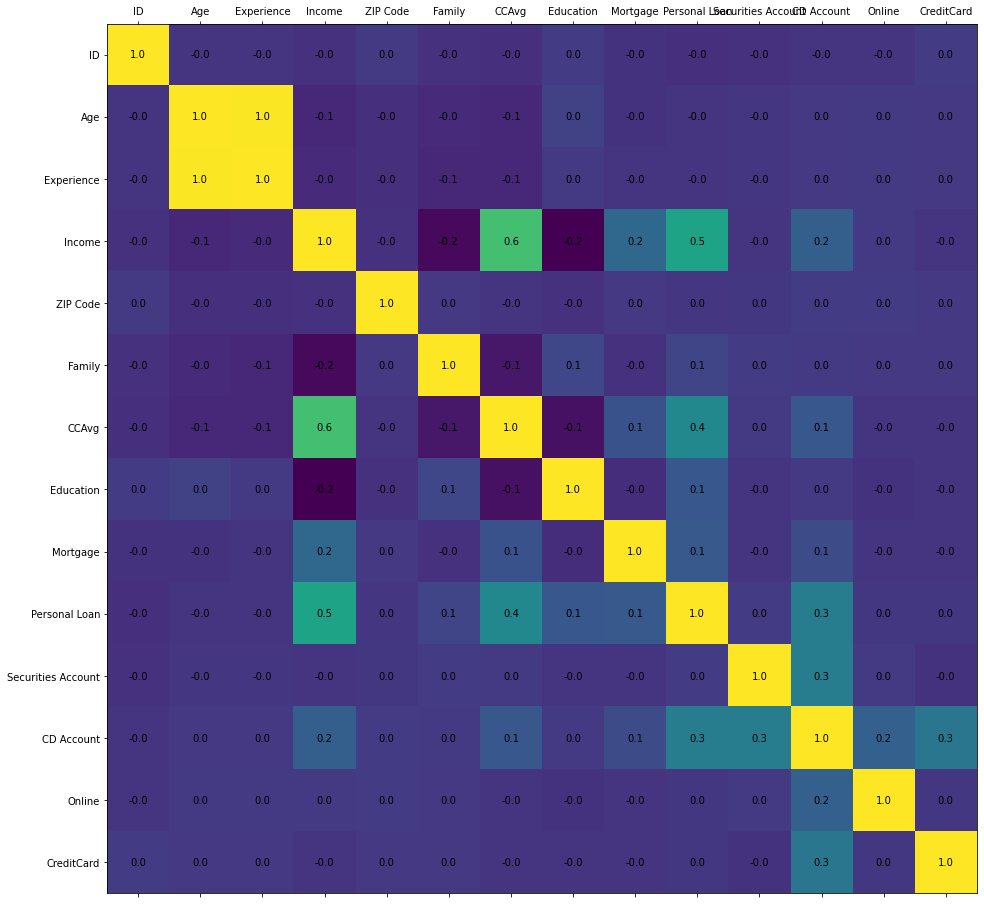

In [14]:
plot_corr(df_data)

The correlation matrix indicates there is relationship between customers who buy a Personal Loan and their Income (.5), CCAvg (.4), CD Account (.3).  It is reasonable to consider creating a new variable that is creating the variable: IncomeandCCavg to determine if there is actionable relationship with buying a Personal Loan

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002950484FAC8>,
      dtype=object)

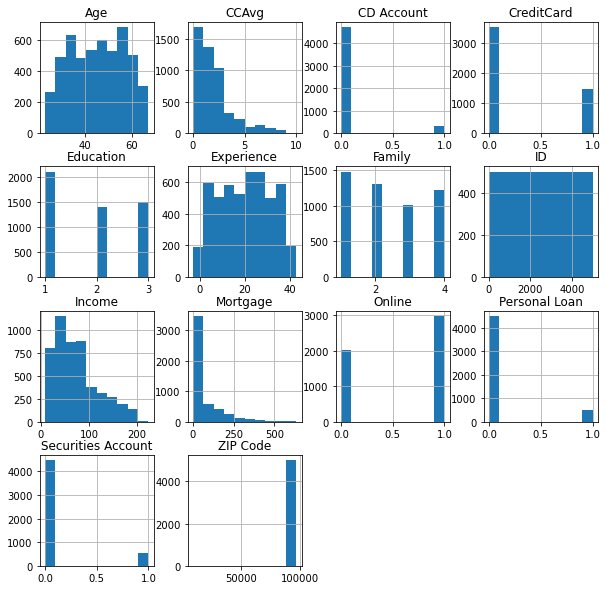

In [15]:
# Univariate Analysis
df_data.hist(figsize=(10,10), grid=True)

(5000, 12)


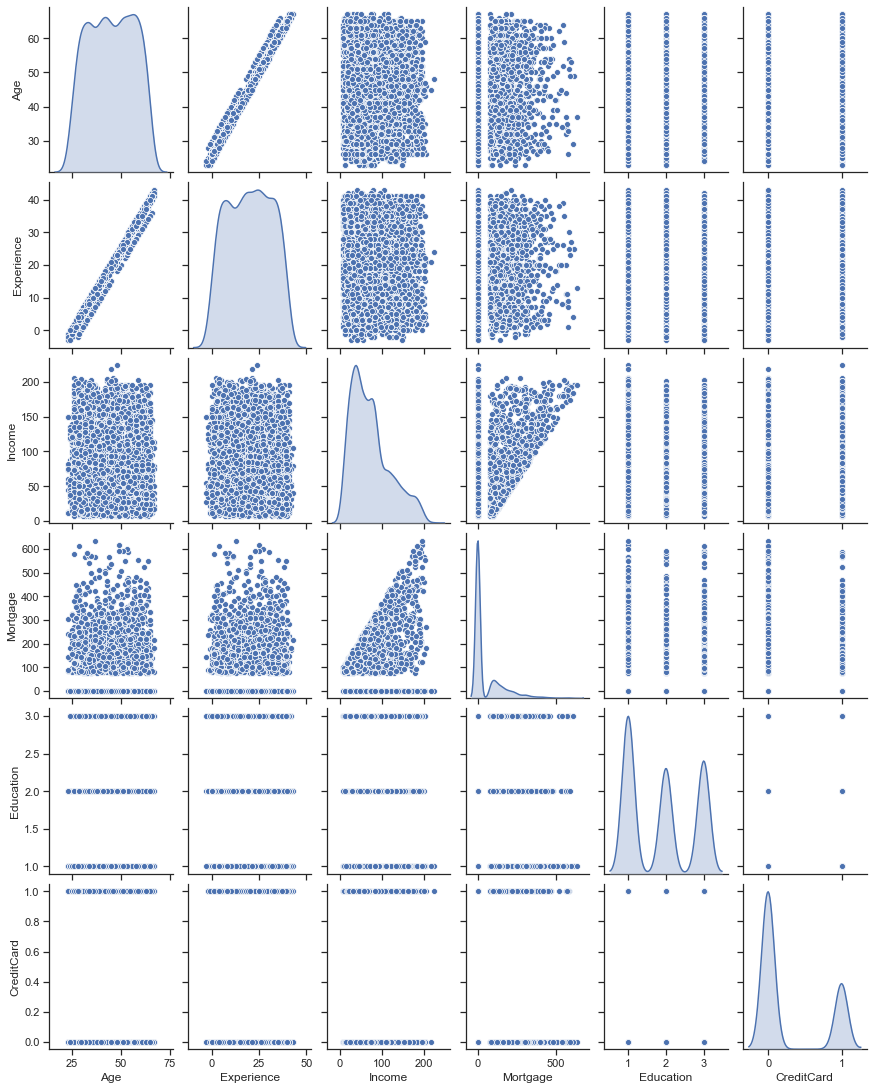

In [16]:
# Bivariate analysis
# Based on the Univariate Analysis some features are not required, ID and Zip Code  beacuse they are not actionable features.
df_data = df_data.drop(columns=['ID','ZIP Code'], axis=1)
print(df_data.shape)
sns.set(rc={'figure.figsize':(10,10)},style="ticks", color_codes=True)
sns.pairplot(data=df_data[['Age', 'Experience', 'Income', 'Mortgage', 'Education', 'CreditCard']], diag_kind="kde", aspect=0.8)


In [17]:
# There is a strong correlation between Age and Experience, Age and Experience are close to a normal distribution.
# Age or Experience column can be dropped because of their strong correlation coefficient = 1.
# Income and Mortgage have a negative skew distribution.
# There is a strong linear relationship between Income and Mortgage.
# Therefore  I am dropping Age 
df_data = df_data.drop(columns=['Age'], axis=1)
df_data.shape

(5000, 11)

# Get data model ready

In [18]:
# Set Category data columns for data that not aready 0s and 1s

df_data['Family'] = df_data['Family'].astype('category')
df_data['Education'] = df_data['Education'].astype('category')

#  Define X and Y variables
X = df_data.drop('Personal Loan', axis=1)
Y = df_data[['Personal Loan']]

#Convert categorical vriables to dummy variables
X = pd.get_dummies(X, drop_first=True)

# Split into training and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30,random_state=1)

Model building using statsmodels.api (sm.add_constant)

In [19]:
# 4.Use Logistic Regressio nmodel to predict the numberof a customersbuying personal loans. Print all the metrics related for evaluating the model 
# performance (15marks)  Confunsion Matrix, Accurach, Precision, recall, specificity
#Build the logistic regression model

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.107507
         Iterations 10


In [20]:
#Summary of logistic regression
# from scipy import stats
# stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:          Personal Loan   No. Observations:                 3500
Model:                          Logit   Df Residuals:                     3486
Method:                           MLE   Df Model:                           13
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:                  0.6565
Time:                        13:26:46   Log-Likelihood:                -376.27
converged:                       True   LL-Null:                       -1095.5
Covariance Type:            nonrobust   LLR p-value:                8.284e-300
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                -13.4225      0.750    -17.900      0.000     -14.892     -11.953
Experience             0.0054      0.009      0.640      0.522      -0.011       0.022
Income              

In [21]:
# Warning
# Quasi-complete separation in a logistic/probit regression happens when the outcome variable separates a 
# predictor variable or a combination of predictor variables to certain degree.
# The maximum likelihood estimate may not exist and the validity of the model fit may be questionable. 

In [22]:
# Calculate Odds Ratio, probability
# create a data frame to collate Odds ratio, probability and p-value of the coef
lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [23]:
# FIlter by significant p-value (pval <0.1) and sort descending by Odds ratio
lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Education_3,4.27,71.45,0.99,0.00
Education_2,4.00,54.86,0.98,0.00
CD Account,3.71,40.78,0.98,0.00
Family_3,2.49,12.05,0.92,0.00
Family_4,1.64,5.17,0.84,0.00
CCAvg,0.25,1.28,0.56,0.00
Income,0.06,1.06,0.52,0.00
Online,-0.59,0.56,0.36,0.00
CreditCard,-1.00,0.37,0.27,0.00
Securities Account,-1.07,0.34,0.26,0.01


    Customers with Education = 3  have a 99% probability of buying a personal loan
    Customers with Education = 2 or CD Account = 1 have a 98% probability of buying a personal loan
    Customers with  Family = 3 have a 93% probability of buying a personal loan
    Customers with  Family = 4 have a 84% probability of buying a personal loan
    From the correlation analysis Personal Loan is related to Income , CCAvg , and CD Account.
    Features such as Experience, Age, Education = 1, Family = 1 or 2, were not important in determining if a person would buy a person loan.    

# 5. Give your reasoning on how can the model perform better? (10 marks) Check parameters
It is difficult to improve the model without identifying one or more objective that would characterize the attributes of the desire model. The bank wants to convert liability customers to personal loan customers and want a model to identify possible customers.

For this project, we want to maximize TP (True Positives) and minimize FN (False Negatives).

The model can be improvrd by adjusting hyperparameters in order to maximize TP and minimize FN. This incluses 1) compoaring the results from different solver options ('newton-cg','lbfgs','liblinear','sag','saga'), 2) penalty (11, 12), 3) class_weight='balanced', and 4) C (.1, .25, .5, .75, .9, 1). Other hyperparameters that can be tuned include tol, intercept_scaling for liblinear, class_weight, and max_iter. .

While the number of features is not a hyperparameter, we could add more features or perform additional analysis on existing features, and/or currently the model is evaulate the affect of a single feature and not a combination of features, for example (Family, Education, Mortgage) 

CCAvg and Income could be assigned a category of Low, Medium, High to determine if additional classification could improve their probabilities. 
 
For Income mean = 73.774200 create a new column where if value is zero if less than the mean and is 1 if greater than or equal to the mean.

# Checking Parameters of logistic regression

'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [24]:
# An example for Income is to consider low inclome and high income based on the mean for income.  
# There are 2,866 low income and 2,134 high income users.  This can be determined from the below code.
# incomeMean = df_data['Income'].mean()
# print('The mean income is: ', incomeMean) 
# df_data['Income_mean'] = df_data['Income'] >= incomeMean
# print('Income_mean:\n', df_data['Income_mean'].value_counts()) 

Model building using Logistic Regression from Sklearn

In [25]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [26]:
y_predict = logreg.predict(X_test)

In [27]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.9585714285714285

Testing accuracy 0.9533333333333334

Confusion Matrix


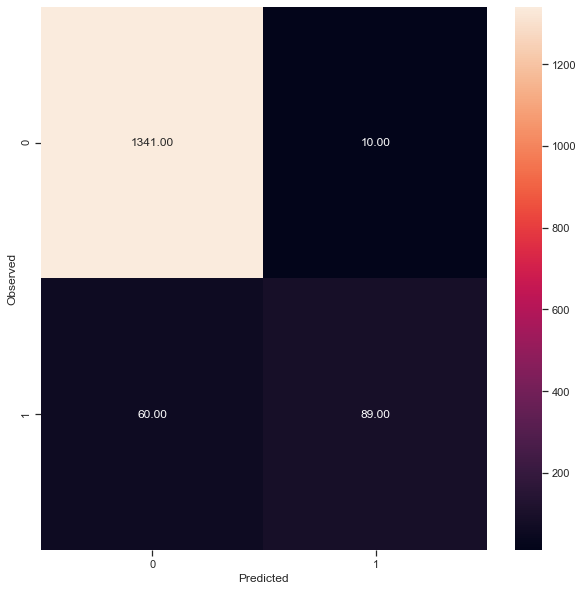

None

Recall: 0.5973154362416108

Precision: 0.898989898989899

F1 Score: 0.7177419354838711

Roc Auc Score: 0.7949567558706203


In [28]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

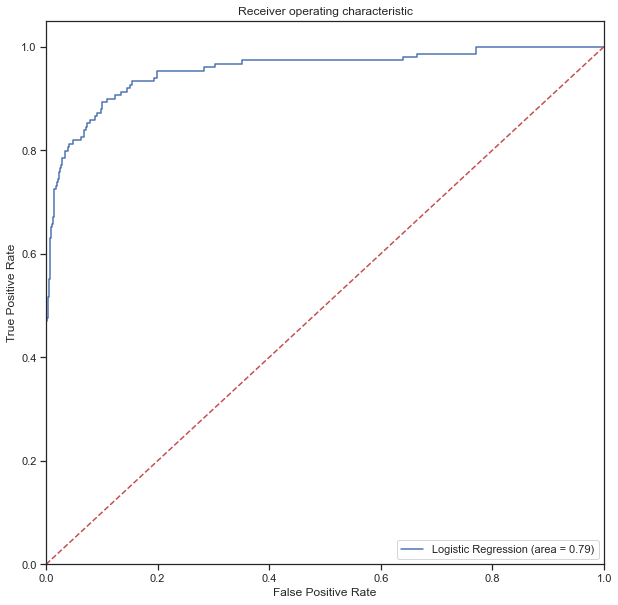

In [29]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [30]:
# Checking Parameters of logistic regression
logreg.get_params()

#If we dont specify the parameters in the model it takes default value

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [41]:
# Running a loop to check different values of 'solver'
# all solver can be used with l2, only 'liblinear' and 'saga' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver = ['newton-cg','lbfgs','liblinear','sag','saga']
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2', C = 1.0,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

[0.962, 0.959, 0.961, 0.897, 0.891]

[0.952, 0.953, 0.951, 0.891, 0.883]


In [32]:
# The best model is newton-cg (Train .962, Test .952) with C = 1.0 and penality = 12

In [42]:
# Test models with penality = 11
train_score=[]
test_score=[]
solver = ['liblinear','saga']   # changing values of solver which works with 'l1'
for i in solver:
    model = LogisticRegression(random_state=42,penalty='l1', C = 1.0,solver=i)  #changed penalty to 'l1'
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(train_score)
print()
print(test_score)

['liblinear', 'saga']

[0.963, 0.891]

[0.955, 0.883]


In [34]:
# Highest accuracy is 'l1' with 'liblinear' 


In [43]:
# changing class weight to balanced
model = LogisticRegression(random_state=42,penalty='l1',solver='liblinear',class_weight='balanced', C=1.0) 
# changing class weight to balanced

model.fit(X_train, y_train) 

y_predict = model.predict(X_test)     

print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))

Trainig accuracy 0.9157142857142857

Testing accuracy 0.9133333333333333


In [ ]:
# The results got worst and will not be using class_weight='balanced'

Testing accuracy increased and model is not overfit so adding class weight from the model, 
Running a loop to check different values of 'C'

In [44]:
train_score=[]                                 
test_score=[]
C = [0.01,0.1,0.25,0.5,0.75,1]
for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(train_score)
print()
print(test_score)

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

[0.906, 0.955, 0.96, 0.961, 0.963, 0.963]

[0.901, 0.943, 0.949, 0.953, 0.955, 0.955]


In [37]:
## Best testing accuracy is obtained for C=0.75

Trainig accuracy 0.9625714285714285

Testing accuracy 0.9553333333333334

Confusion Matrix


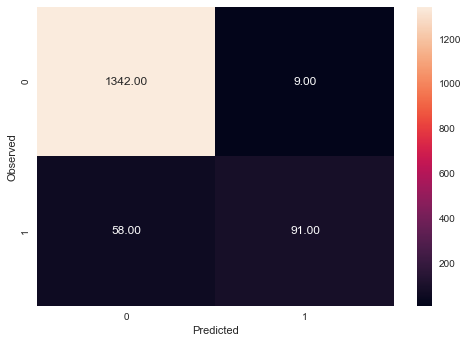

None

Recall: 0.610738255033557

Precision: 0.91

F1 Score: 0.7309236947791165

Roc Auc Score: 0.8020382614916121


In [47]:
#Therefore final model is
model = LogisticRegression(random_state=42,penalty='l1', solver='liblinear', C=0.75) 
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
print("Trainig accuracy",model.score(X_train,y_train))  
print()
print("Testing accuracy",model.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

In [39]:
# 6. Give Business understanding of your model? (5 marks) 

# Confusion matrix means

True Positive (observed=1, predicted=1):  91 customers would buy a personal loan 

False Positive (observed=0, predicted=1): 9  customers would buy a personal loan but in fact they would not buy

True Negative (observed=0, predicted=0): 1342 customer would not buy a personal loan

False Negative (observed=1, predicted=0): 58  customers would not buy a personal loan but in fact they would buy



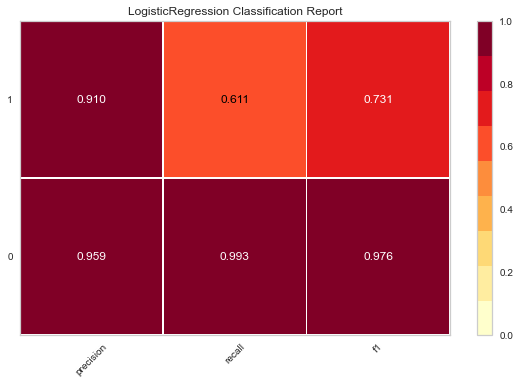

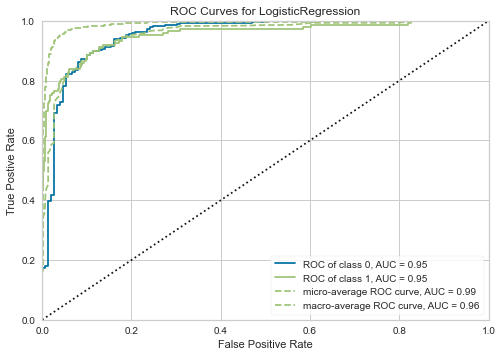

In [48]:
# Additional analysis using yellowbrick classifier 

from yellowbrick.classifier import ClassificationReport, ROCAUC
# Visualize model performance with yellowbrick library
viz = ClassificationReport(model)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(model)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [ ]:
# In conclusion, the bank wants to identify liability customers with a high likelihood will buy a personal loan. 
# the model has a very good precision of 91%, the model is a better fit in predicting who will not buy 
# a personal loan versus predicting who will buy a personal loan. Recall is not that good at .611 for Positives.